<div align="center">
      <h1>Training the Multilayer Perceptron (MLP)</h1>
      <hr>
</div>

## Learning Objectives

In this notebook, we will focus on training a Multilayer Perceptron (MLP) model using the CIFAR-10 dataset, which is commonly used for image classification tasks. The primary objective is not just to train the model, but also to explore the impact of different hyperparameters on the training process and the model's performance.

You will experiment with various hyperparameters, such as the learning rate, number of hidden units, batch size, and number of epochs. Through these experiments, you’ll gain hands-on experience in observing how each hyperparameter influences the speed of convergence, the accuracy of the model, and its ability to generalize to new, unseen data.

By the end of this notebook, you should have a solid understanding of how tuning hyperparameters can significantly affect the performance of a neural network like the MLP, and how to optimize them for better results in image classification tasks.


In [153]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


CIFAR-10 dataset already exists


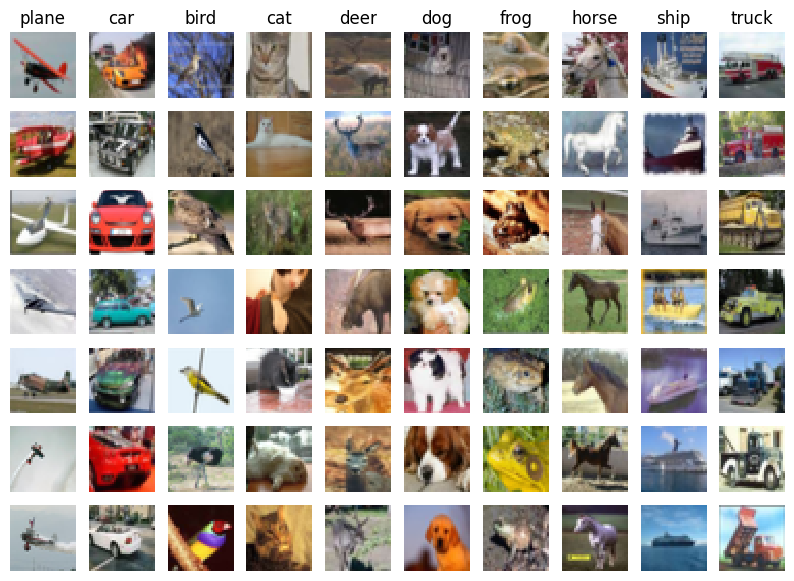

---------------- Training data ----------------
X_train shape: (45000, 32, 32, 3), y_train shape: (45000,)

---------------- Validation data ----------------
X_val shape: (5000, 32, 32, 3), y_val shape: (5000,)

---------------- Testing data ----------------
X_test shape: (10000, 32, 32, 3), y_test shape: (10000,)

---------------- Dataset info ----------------
Number of classes: 10
Number of features: 3072
Number of samples in dataset: 60000
Number of samples in training set: 45000, which is 75.00% of the dataset
Number of samples in validation set: 5000, which is 8.33% of the dataset
Number of samples in testing set: 10000, which is 16.67% of the dataset
arrays: torch.Size([45000, 3072])


In [154]:
import os
import torch
from utils import load_cifar10, reshape_to_vectors, dataset_stats, normalize_torch

notebook_dir = os.getcwd()
dataset_path = os.path.join(notebook_dir, 'data', 'datasets', 'CIFAR10')

# download the CIFAR-10 dataset
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10(directory=dataset_path,
                                                              visualize_samples=True)

# Print out the dataset statistics and visualize a few samples
num_features, num_classes, num_samples = dataset_stats(X_train, y_train, X_val, y_val, X_test, y_test, verbose=True)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()

X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val).long()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

# Reshape the data to vectors and normalize them
X_train, X_val, X_test = reshape_to_vectors(X_train, X_val, X_test)
data = normalize_torch(X_train, X_val, X_test)
X_train, X_val, X_test = data['normalized_arrays']

## Training the MLP

This assignment is all about choosing the right hyperparameters for the MLP. You will have to experiment with different values for the hyperparameters and observe the effect on the training process. Your task is to achieve the highest possible accuracy on the test set. Don't worry about validation set for now, the validation and test set are the same in this assignment. 

The hyperparameters that you will have to experiment with are:

- `hidden_dim_1` **(Number of hidden units in the first hidden layer)**:
    This controls how many neurons or units are in the first hidden layer of your neural network. More units generally allow the model to capture more complex patterns but may lead to overfitting if set too high.

- `hidden_dim_2` **(Number of hidden units in the second hidden layer)**:
    Similar to hidden_dim_1, but it controls the number of neurons in the second hidden layer. If you have a deep network, adjusting this can impact how the model captures relationships across different features.

- `reg` **(Regularization strength)**:
    Regularization helps prevent overfitting by penalizing large weights. reg determines how strong the regularization is. Higher values make the penalty for large weights stronger, forcing the model to keep the weights smaller, which improves generalization at the cost of potential underfitting.

- `learning_rate` **(Learning rate)**:
    The learning rate controls how big the steps are when updating the model’s parameters during training. A smaller learning rate makes updates more gradual, which may help reach a more precise minimum, but training will be slower. A larger learning rate can make training faster but risks overshooting the optimal weights.

- `batch_size` **(Batch size)**:
    This refers to how many training examples are used in one iteration of the training loop before updating the model’s parameters. A smaller batch size leads to more frequent updates and can make training faster but noisier, while a larger batch size makes updates smoother but may require more memory.

- `num_iters` **(Number of iterations)**:
    The number of times the entire dataset (or mini-batches if using stochastic gradient descent) is passed through the network during training. More iterations allow the model to learn better, but too many can lead to overfitting. This also depends on the learning rate and convergence behavior.

Now it's time to initialize these hyperparameters that are in the following cell. 

In [155]:
# Hyperparameters of my best-scoring MLP (Friendship is Magic)
hidden_dim_1 = 512  # the number of hidden units in the first hidden layer (int)
hidden_dim_2 = 128 # the number of hidden units in the second hidden layer (int)
reg = 0.01  # the regularization strength (float)
learning_rate = 0.02  # the learning rate (float)
batch_size = 128  # the batch size (int) 45000 in total
num_iters = 10000 # the number of iterations (int) 

Training: 100%|██████████| 10000/10000 [02:58<00:00, 56.17it/s]


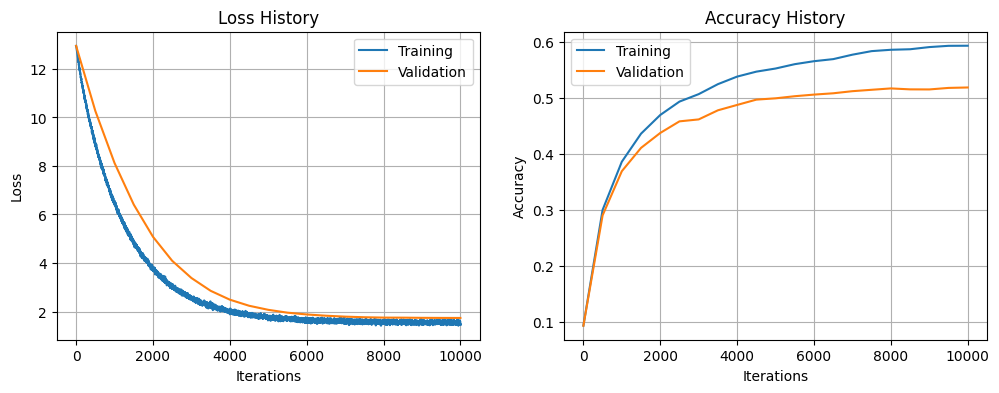

In [156]:
import torch

from utils import plot_training
from assignments import MLPClassifier

torch.random.manual_seed(69)

# Train the MLP with ReLU activation function
mlp_relu = MLPClassifier(num_features, 
                         hidden_dim_1, 
                         hidden_dim_2, 
                         num_classes, 
                         reg=reg,
                         learning_rate=learning_rate,
                         batch_size=batch_size,
                         num_iters=num_iters)
relu_loss_history, relu_acc_history = mlp_relu.train(X_train, y_train, X_val, y_val)

# Plot the training loss and accuracy and visualize the decision boundaries
plot_training(relu_loss_history, relu_acc_history, ema=True, alpha=0.5)

## Training Summary

### Best Model Summary
The best model I trained had an accuracy of only slightly above 50% on both datasets. The hyperparameters used to achieve this performance are the ones in the cell above. The following models used to showcase the impact of each hyperparameter on the training process are all derived from the same model architecture as the best model. The only difference between them is the hyperparameter discussed in the respective section.

### Parameter tuning findings
The following are the findings from the parameter tuning experiments:
1. **Hidden Units**: Increasing the number of hidden units in the first and second hidden layers improved the model's performance. However, adding too many units led to overfitting, as the model started to memorize the training data instead of learning the underlying patterns. In the opposite case, using too less hidden units led to the model reaching its maximum accuracy and then starting to rapidly vary in accuracy as it hit the limit of its learning capacity. The number of hidden units in the first hidden layer had a more significant impact on the model's performance than the number of hidden units in the second hidden layer. This is because it is responsible for capturing the initial patterns in the data. The second hidden layer should reduce the dimensionality of the data and capture more complex patterns, which are even more abstract for humans to understand and is hard to set a specific number of units for.
2. **Regularization Strength**: A higher regularization strength can help prevent overfitting by penalizing large weights. However, setting the regularization strength too high will completely tank the models performance and lead to irratic behaviour in the loss and accuracy plots.
3. **Learning Rate**: A smaller learning rate led to slower convergence but helped the model reach a higher accuracy score over time. On the other hand, a larger learning rate led to faster convergence but resulted in overshooting the optimal weights and oscillations in the loss function and accuracy of the model.
4. **Batch Size**: A smaller batch size led to more frequent updates and faster training but introduced more instability into the progress of the training process as there might have been too little examples for each class (or some classes missing entirely). A larger batch size led to smoother updates but required more memory, computational resources, and time to train the model. Not to mention that it made my computer sound like a jet engine and my father ask me if I was mining bitcoin.
5. **Number of Iterations**: Increasing the number of iterations allowed the model to learn better from the data. However, too many iterations seem to lead to memorisation behaviour as discussed before. This is visible in the training and test accuracy plots, where the training accuracy kept increasing while the validation accuracy plateaued after a certain point. This the beginning of the plateau is what I would say is the sweet spot for the number of iterations.


#### Suboptimal Training Process 1 (Not enough hidden units) - oscillations in the loss function and accuracy

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Training: 100%|██████████| 10000/10000 [00:30<00:00, 329.91it/s]


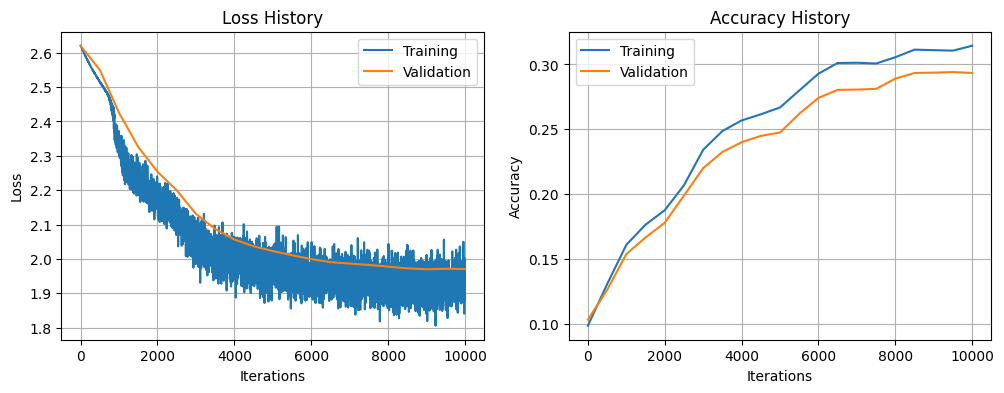

In [157]:
hidden_dim_1 = 16  # the number of hidden units in the first hidden layer (int)
hidden_dim_2 = 2 # the number of hidden units in the second hidden layer (int)
reg = 0.01  # the regularization strength (float)
learning_rate = 0.02  # the learning rate (float)
batch_size = 128  # the batch size (int) 45000 in total
num_iters = 10000 # the number of iterations (int) 

mlp_relu = MLPClassifier(num_features, 
                         hidden_dim_1, 
                         hidden_dim_2, 
                         num_classes, 
                         reg=reg,
                         learning_rate=learning_rate,
                         batch_size=batch_size,
                         num_iters=num_iters)
relu_loss_history, relu_acc_history = mlp_relu.train(X_train, y_train, X_val, y_val)

# Plot the training loss and accuracy and visualize the decision boundaries
plot_training(relu_loss_history, relu_acc_history, ema=True, alpha=0.5)

#### Suboptimal Training Process 2 (too high regularization strength) - underfitting

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Training: 100%|██████████| 10000/10000 [02:45<00:00, 60.40it/s]


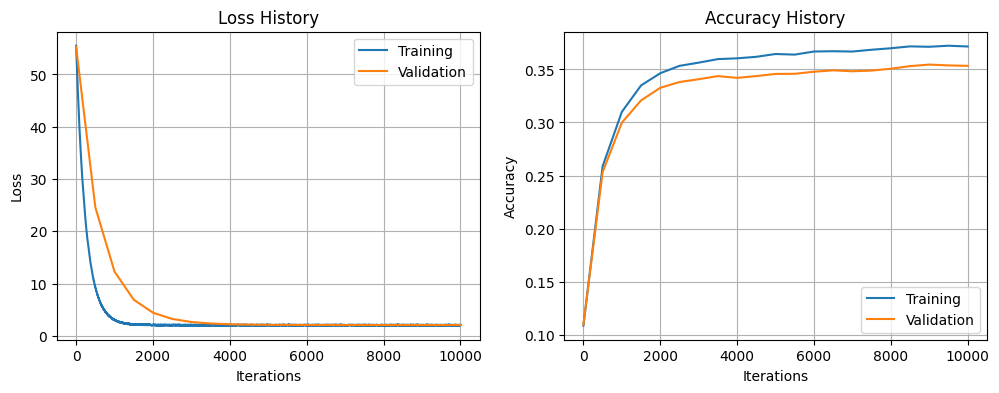

In [158]:
hidden_dim_1 = 512  # the number of hidden units in the first hidden layer (int)
hidden_dim_2 = 128 # the number of hidden units in the second hidden layer (int)
reg = 0.05  # the regularization strength (float)
learning_rate = 0.02  # the learning rate (float)
batch_size = 128  # the batch size (int) 45000 in total
num_iters = 10000 # the number of iterations (int) 

# Train the MLP with ReLU activation function
mlp_relu = MLPClassifier(num_features, 
                         hidden_dim_1, 
                         hidden_dim_2, 
                         num_classes, 
                         reg=reg,
                         learning_rate=learning_rate,
                         batch_size=batch_size,
                         num_iters=num_iters)
relu_loss_history, relu_acc_history = mlp_relu.train(X_train, y_train, X_val, y_val)

# Plot the training loss and accuracy and visualize the decision boundaries
plot_training(relu_loss_history, relu_acc_history, ema=True, alpha=0.5)

#### Suboptimal Training Process 3 (too high learning rate) - overshooting optimal weights, oscillations in accuracy

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Training: 100%|██████████| 10000/10000 [02:47<00:00, 59.66it/s]


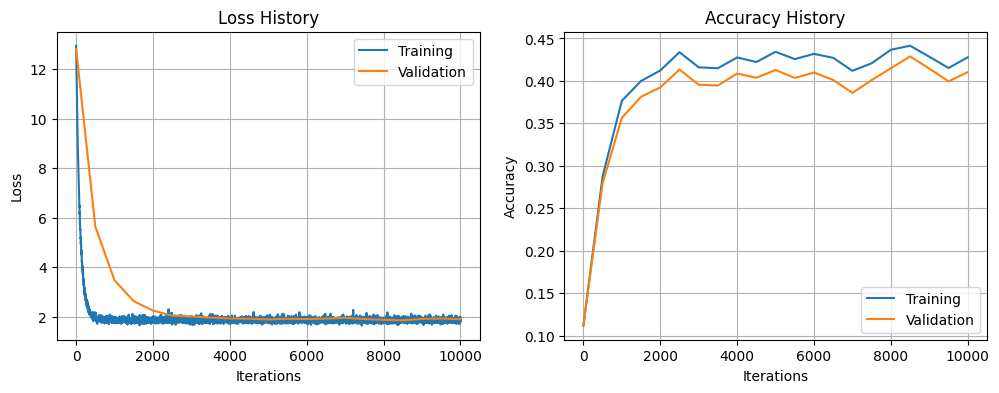

In [163]:
hidden_dim_1 = 512  # the number of hidden units in the first hidden layer (int)
hidden_dim_2 = 128 # the number of hidden units in the second hidden layer (int)
reg = 0.01  # the regularization strength (float)
learning_rate = 0.25  # the learning rate (float)
batch_size = 128  # the batch size (int) 45000 in total
num_iters = 10000 # the number of iterations (int) 

# Train the MLP with ReLU activation function
mlp_relu = MLPClassifier(num_features, 
                         hidden_dim_1, 
                         hidden_dim_2, 
                         num_classes, 
                         reg=reg,
                         learning_rate=learning_rate,
                         batch_size=batch_size,
                         num_iters=num_iters)
relu_loss_history, relu_acc_history = mlp_relu.train(X_train, y_train, X_val, y_val)

# Plot the training loss and accuracy and visualize the decision boundaries
plot_training(relu_loss_history, relu_acc_history, ema=True, alpha=0.5)

#### Suboptimal Training Process 4 (too small batch size) - noisy updates, unstable training process

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Training: 100%|██████████| 10000/10000 [02:10<00:00, 76.74it/s]


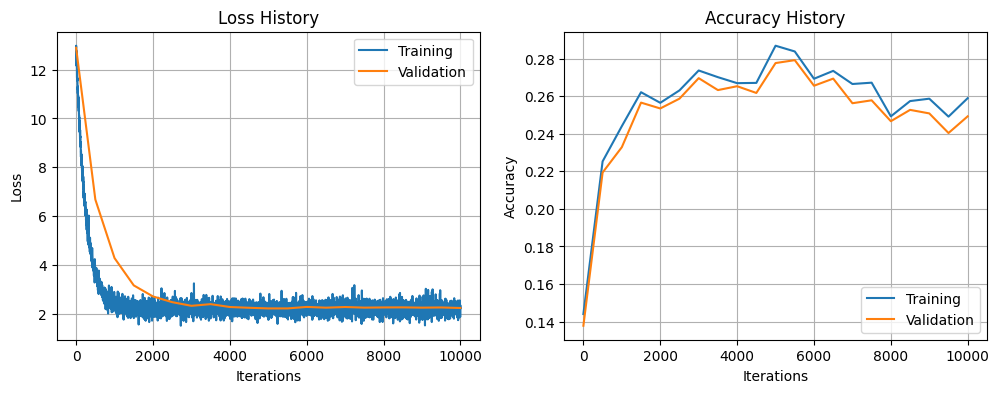

In [162]:
hidden_dim_1 = 512  # the number of hidden units in the first hidden layer (int)
hidden_dim_2 = 128 # the number of hidden units in the second hidden layer (int)
reg = 0.01  # the regularization strength (float)
learning_rate = 0.1  # the learning rate (float)
batch_size = 8  # the batch size (int) 45000 in total
num_iters = 10000 # the number of iterations (int) 

# Train the MLP with ReLU activation function
mlp_relu = MLPClassifier(num_features, 
                         hidden_dim_1, 
                         hidden_dim_2, 
                         num_classes, 
                         reg=reg,
                         learning_rate=learning_rate,
                         batch_size=batch_size,
                         num_iters=num_iters)
relu_loss_history, relu_acc_history = mlp_relu.train(X_train, y_train, X_val, y_val)

# Plot the training loss and accuracy and visualize the decision boundaries
plot_training(relu_loss_history, relu_acc_history, ema=True, alpha=0.5)

#### Suboptimal Training Process 5 (too many iterations) - plateauing of validation accuracy, overfitting
Do not run the following cell if you dont have a bitcoin mining rig you plan on using to train the model.

In [ ]:
hidden_dim_1 = 512  # the number of hidden units in the first hidden layer (int)
hidden_dim_2 = 128 # the number of hidden units in the second hidden layer (int)
reg = 0.01  # the regularization strength (float)
learning_rate = 0.1  # the learning rate (float)
batch_size = 128  # the batch size (int) 45000 in total
num_iters = 20000 # the number of iterations (int) 

# Train the MLP with ReLU activation function
mlp_relu = MLPClassifier(num_features, 
                         hidden_dim_1, 
                         hidden_dim_2, 
                         num_classes, 
                         reg=reg,
                         learning_rate=learning_rate,
                         batch_size=batch_size,
                         num_iters=num_iters)
relu_loss_history, relu_acc_history = mlp_relu.train(X_train, y_train, X_val, y_val)

# Plot the training loss and accuracy and visualize the decision boundaries
plot_training(relu_loss_history, relu_acc_history, ema=True, alpha=0.5)

Training:  31%|███▏      | 6271/20000 [01:48<03:27, 66.11it/s]